In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
original_train_df = pd.read_csv('./Data/train.csv')

In [4]:
original_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
original_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
original_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
original_train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
def extract_title(df_to_modify):
    least_occuring_titles = ['Dr','Rev','Major','Col','Capt','Jonkheer','Don','Sir']
    
    df_to_modify['Title'] = df_to_modify.Name.str.extract('([A-Za-z]+)\.')
    
    df_to_modify['Feature_Title'] = df_to_modify['Title']
    df_to_modify['Feature_Title'] = df_to_modify['Feature_Title'].replace(['Ms','Mme','Countess'],'Mrs')
    df_to_modify['Feature_Title'] = df_to_modify['Feature_Title'].replace(['Lady','Mlle'],'Miss')
    df_to_modify['Feature_Title'] = df_to_modify['Feature_Title'].replace(least_occuring_titles,'Rare')
    df_to_modify['Feature_Title'] = df_to_modify['Feature_Title'].map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Rare':4},na_action='ignore')
    df_to_modify['Feature_Title'] = df_to_modify['Feature_Title'].fillna(4)

    return df_to_modify

Survived         1.000000
Sex              0.543351
Feature_Title    0.406159
Pclass           0.338481
Fare             0.257307
Embarked         0.108669
Parch            0.081629
Age              0.077221
SibSp            0.035322
PassengerId      0.005007
Name: Survived, dtype: float64

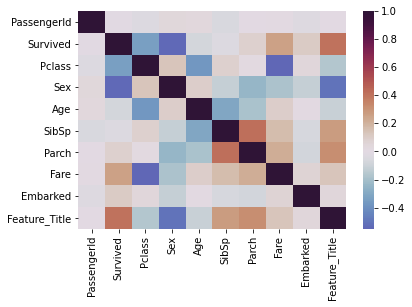

<Figure size 1080x1080 with 0 Axes>

In [13]:
analyzed_train_df = original_train_df.copy()
analyzed_train_df.Sex = original_train_df.Sex.map({'female':0,'male':1})
analyzed_train_df.Embarked = original_train_df.Embarked.map({'S':0,'C':1,'Q':2})

analyzed_train_df = extract_title(analyzed_train_df)

sns.heatmap(analyzed_train_df.corr(),cmap='twilight_shifted',center=0)
plt.figure(figsize=(15, 15))
np.abs(analyzed_train_df.corr()["Survived"]).sort_values(ascending=False)

# Data Cleaning


Sex, Fare and Pclass seems the biggest indicators of survivability

#### On numerical elements :
- Dropping all expect Pclass and Fare
- Scaling the values

#### On object elements
- One-Hot encoders for Sex and Embarked feature 

In [9]:
train_df = original_train_df.copy()

In [235]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numeric_features = ['Fare','Relative_Number']
categorical_feature = ['Sex','Feature_Title','Embarked','Pclass']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),        
    ])


cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OrdinalEncoder()),
    ])

buck_pipeline = Pipeline([
     ("imputer", SimpleImputer(strategy="median")),
     ("bucketer", KBinsDiscretizer(n_bins=6,encode='ordinal',strategy="uniform")),
   ])

full_pipeline = ColumnTransformer([
    ("buck", buck_pipeline, ['Age']),
    ("numerical", num_pipeline, numeric_features),
    ("categorical", cat_pipeline, categorical_feature)
])


In [236]:
train_df = extract_title(train_df)

train_df['Relative_Number'] = train_df['SibSp'] + train_df['Parch']

train_df_prepared = full_pipeline.fit_transform(train_df)

In [237]:
train_df_prepared

array([[ 1.        , -0.50244517,  0.05915988, ...,  0.        ,
         2.        ,  2.        ],
       [ 2.        ,  0.78684529,  0.05915988, ...,  2.        ,
         0.        ,  0.        ],
       [ 1.        , -0.48885426, -0.56097483, ...,  1.        ,
         2.        ,  2.        ],
       ...,
       [ 2.        , -0.17626324,  1.29942929, ...,  1.        ,
         2.        ,  2.        ],
       [ 1.        , -0.04438104, -0.56097483, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.        , -0.49237783, -0.56097483, ...,  0.        ,
         1.        ,  2.        ]])

# Model selection and training

In [238]:
train_df_labels = original_train_df['Survived']

In [239]:
from sklearn.ensemble import RandomForestClassifier
rand_forest_clf = RandomForestClassifier()
rand_forest_clf.fit(train_df_prepared,train_df_labels)

RandomForestClassifier()

In [240]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(train_df_prepared,train_df_labels)

SVC()

In [241]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_df_prepared,train_df_labels)

KNeighborsClassifier()

In [242]:
# Model comparison using cross-validation
from sklearn.model_selection import cross_val_predict
rand_forest_probas = cross_val_predict(rand_forest_clf,train_df_prepared,train_df_labels,cv=10,method='predict_proba')
svc_scores = cross_val_predict(svc_clf,train_df_prepared,train_df_labels,cv=10,method='decision_function')
knn_probas = cross_val_predict(knn_clf,train_df_prepared,train_df_labels,cv=10,method='predict_proba')

In [243]:
from sklearn.metrics import roc_curve
rand_forest_fpr, rand_forest_tpr, rand_forest_thresholds = roc_curve(train_df_labels,rand_forest_probas[:,1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(train_df_labels,svc_scores)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(train_df_labels,knn_probas[:,1])

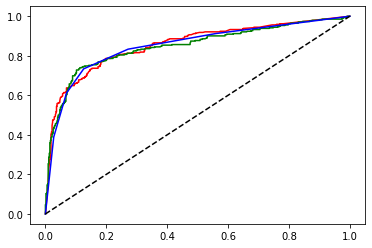

In [244]:
plt.plot(rand_forest_fpr,rand_forest_tpr,'r')
plt.plot(svc_fpr,svc_tpr,'g')
plt.plot(knn_fpr,knn_tpr,'b')
plt.plot([0,1],[0,1],'k--')

In [245]:
from sklearn.metrics import roc_auc_score
print('random forest  = {}'.format(roc_auc_score(train_df_labels,rand_forest_probas[:,1])))
print('SVC            = {}'.format(roc_auc_score(train_df_labels,svc_scores)))
print('KNearest Neigh.= {}'.format(roc_auc_score(train_df_labels,knn_probas[:,1])))

random forest  = 0.8556546192439205
SVC            = 0.8474499089253187
KNearest Neigh.= 0.8510822441653618


In [267]:
from sklearn.model_selection import GridSearchCV


param_grid = dict(n_estimators=[50,100,150,200,250,300,400,500],max_depth=[1,5,10,20,50,100])

rand_grid_search = GridSearchCV(rand_forest_clf,param_grid,cv=10,scoring='roc_auc',return_train_score=True)

rand_grid_search.fit(train_df_prepared,train_df_labels)

rand_grid_search.best_params_

{'max_depth': 5, 'n_estimators': 500}

In [268]:
selected_rand_forest_clf = rand_grid_search.best_estimator_

Highly Recommended : using cross-validation to evaluate the model wrt to a certain metric

Once we have some models for comparison : we choose one (or two) and fine-tune it

Fine tuning can be done manually (lol) or better yet, with grid search, or even better : random grid search

Then, we can analyze the trained model (which is the most important feature for exemple, does it match our initial analyzis ?)

And then use the test model to evaluate.

Then production ...



# Prediction and submission

In [269]:
def predict_and_submit_csv(test_df,X_prepared,model):

    y_predicted = model.predict(X_prepared)

    prediction_df = test_df[['PassengerId']].copy()
    prediction_df = prediction_df.assign(Survived=y_predicted)
    prediction_df.to_csv('./deeplearning_submission.csv',index=False,header=True)

In [270]:
original_test_df = pd.read_csv('./Data/test.csv')
test_df = original_test_df.copy()
test_df = extract_title(test_df)
test_df['Relative_Number'] = test_df['SibSp'] + test_df['Parch']
X_prepared = full_pipeline.fit_transform(test_df)

predict_and_submit_csv(test_df,X_prepared,selected_rand_forest_clf)